In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading saved data set

In [4]:
df=pd.read_csv('city__weather.csv')
df

,Date,Temperature (°C),Humidity (%),Air Quality Index
0,2023-06-30,33.915592,55.749317,156.432128
1,2023-07-01,38.740492,82.010308,205.661085
2,2023-07-02,35.480138,70.881301,98.495172
3,2023-07-03,33.801612,71.380347,163.960650
4,2023-07-04,30.285989,52.041461,56.105778
...,...,...,...,...
362,2024-06-26,33.770373,53.956321,29.521029
363,2024-06-27,31.250431,61.055285,281.269553
364,2024-06-28,43.579201,54.572236,187.990375
365,2024-06-29,31.299515,53.975415,171.396351


# Converting Date column to a datetime format and setting it as index

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index("Date", inplace=True)
print(df)

            Temperature (°C)  Humidity (%)  Air Quality Index
Date                                                         
2023-06-30         33.915592     55.749317         156.432128
2023-07-01         38.740492     82.010308         205.661085
2023-07-02         35.480138     70.881301          98.495172
2023-07-03         33.801612     71.380347         163.960650
2023-07-04         30.285989     52.041461          56.105778
...                      ...           ...                ...
2024-06-26         33.770373     53.956321          29.521029
2024-06-27         31.250431     61.055285         281.269553
2024-06-28         43.579201     54.572236         187.990375
2024-06-29         31.299515     53.975415         171.396351
2024-06-30         39.000861     48.567034         103.426706

[367 rows x 3 columns]


# Summary and Statistics of Data set

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 367 entries, 2023-06-30 to 2024-06-30
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature (°C)   367 non-null    float64
 1   Humidity (%)       367 non-null    float64
 2   Air Quality Index  367 non-null    float64
dtypes: float64(3)
memory usage: 11.5 KB
None


In [7]:
print(df.describe())

       Temperature (°C)  Humidity (%)  Air Quality Index
count        367.000000    367.000000         367.000000
mean          32.273464     60.752428         156.329481
std            8.371363     15.330378          78.181224
min           18.136169     35.140567          25.144681
25%           25.036188     47.943671          89.735174
50%           32.538407     58.739034         153.194509
75%           39.016618     73.479518         225.916202
max           46.966563     86.962456         289.949273


In [8]:
print(df.describe().T)

                   count        mean        std        min        25%  \
Temperature (°C)   367.0   32.273464   8.371363  18.136169  25.036188   
Humidity (%)       367.0   60.752428  15.330378  35.140567  47.943671   
Air Quality Index  367.0  156.329481  78.181224  25.144681  89.735174   

                          50%         75%         max  
Temperature (°C)    32.538407   39.016618   46.966563  
Humidity (%)        58.739034   73.479518   86.962456  
Air Quality Index  153.194509  225.916202  289.949273  


In [9]:
print(df['Temperature (°C)'].sum())

11844.361113749246


In [10]:
print(df['Humidity (%)'].sum())

22296.141041590847


In [11]:
print(df['Air Quality Index'].sum())

57372.91941011484


In [12]:
print(df['Temperature (°C)'].mean())


32.2734635252023


In [13]:
print(df['Humidity (%)'].mean())

60.75242790624209


In [14]:
print(df['Air Quality Index'].mean())

156.32948068151182


In [15]:
print(df['Temperature (°C)'].median())

32.53840707587437


In [16]:
print(df['Humidity (%)'].median())

58.73903434565808


In [17]:
print(df['Air Quality Index'].median())

153.1945091459601


In [18]:
print(df['Temperature (°C)'].std())

8.371363269026352


In [19]:
print(df['Humidity (%)'].std())

15.330377543084543


In [20]:
print(df['Air Quality Index'].std())

78.18122358188666


# Using numpy, calculating the moving average of the temperature for a 7-day window

In [21]:
column_name='Temperature (°C)'
window_size=7
data=df['Temperature (°C)'].values

In [22]:
def moving_average(data, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(data, window, mode='valid')

In [23]:
moving_avg = moving_average(data, window_size)

In [24]:
moving_avg_full = np.full(data.shape, np.nan)
moving_avg_full[window_size-1:] = moving_avg
df['moving_average_of_Temperature (°C)'] = moving_avg_full

In [25]:
print(df)

            Temperature (°C)  Humidity (%)  Air Quality Index  \
Date                                                            
2023-06-30         33.915592     55.749317         156.432128   
2023-07-01         38.740492     82.010308         205.661085   
2023-07-02         35.480138     70.881301          98.495172   
2023-07-03         33.801612     71.380347         163.960650   
2023-07-04         30.285989     52.041461          56.105778   
...                      ...           ...                ...   
2024-06-26         33.770373     53.956321          29.521029   
2024-06-27         31.250431     61.055285         281.269553   
2024-06-28         43.579201     54.572236         187.990375   
2024-06-29         31.299515     53.975415         171.396351   
2024-06-30         39.000861     48.567034         103.426706   

            moving_average_of_Temperature (°C)  
Date                                            
2023-06-30                                 NaN  
2023-07

# Creating a line plot of the Temperature and its 7-Day Moving Average 

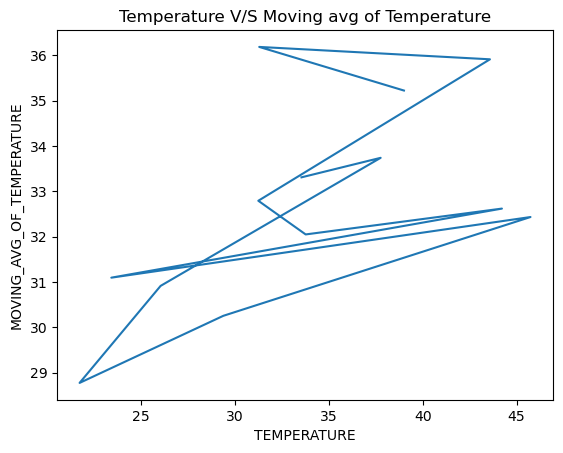

In [26]:
X=[33.54914735,37.76038281, 26.05028683, 21.7369564 , 29.38759462, 45.73576596,
 23.42679586, 44.21553469, 33.77037255, 31.25043123, 43.5792009 , 31.29951489,
 39.00086146]
Y=[33.30580956, 33.73604346 ,30.91128917, 28.77063478 ,30.2509325 , 32.43008895,
 31.09241855 ,32.61618817 ,32.0461867 , 32.78906447 ,35.90938512 ,36.18251658,
 35.22038737]
plt.plot(X,Y)
plt.title("Temperature V/S Moving avg of Temperature")
plt.xlabel("TEMPERATURE")
plt.ylabel("MOVING_AVG_OF_TEMPERATURE")
plt.show()


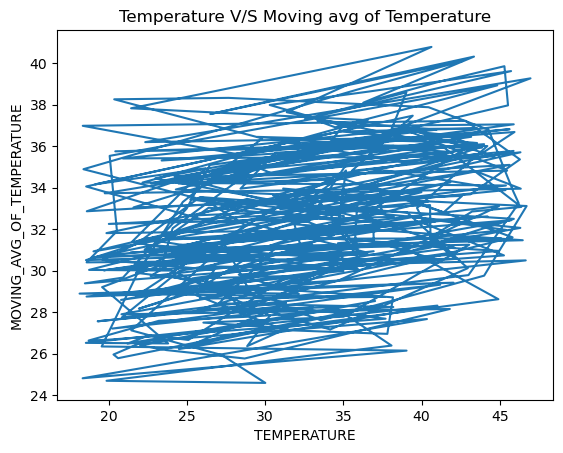

In [27]:
X=df['Temperature (°C)'].values
Y=df['moving_average_of_Temperature (°C)'].values 
plt.plot(X,Y)
plt.title("Temperature V/S Moving avg of Temperature")
plt.xlabel("TEMPERATURE")
plt.ylabel("MOVING_AVG_OF_TEMPERATURE")
plt.show()


# Bar plot showing the average of AIR QUALITY INDEX for each month

In [28]:
df['Year'] = df.index.year
df['Month'] = df.index.month

In [29]:
monthly_avg = df.groupby(['Year', 'Month'])['Air Quality Index'].mean().reset_index()
monthly_avg_pivot = monthly_avg.pivot(index='Month', columns='Year', values='Air Quality Index')

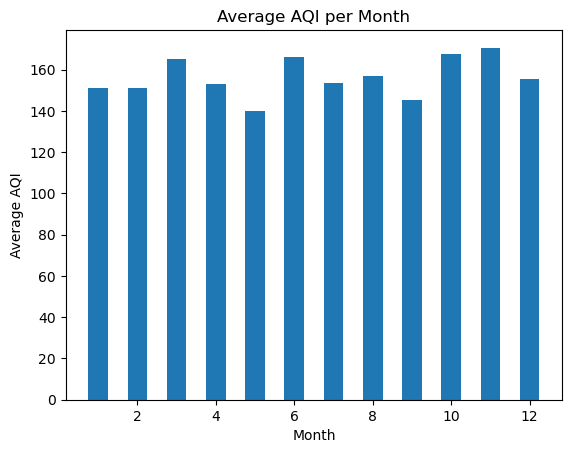

In [30]:
plt.bar(monthly_avg['Month'], monthly_avg['Air Quality Index'], width=0.5)

plt.title('Average AQI per Month')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.show()


# Scatter plot to analyze relation between Temperature and AQI

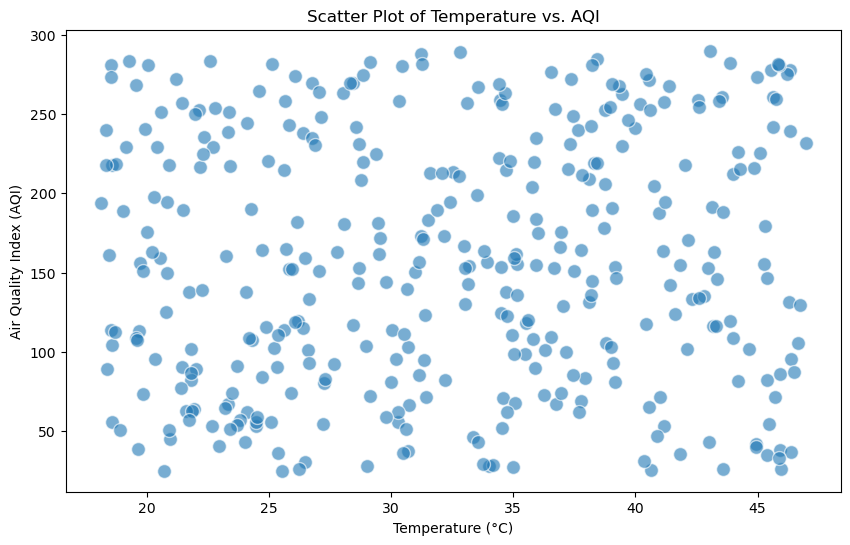

In [31]:
plt.figure(figsize=(10, 6)) 
plt.scatter(df['Temperature (°C)'], df['Air Quality Index'], alpha=0.6, edgecolors='w', s=100)

plt.title('Scatter Plot of Temperature vs. AQI')
plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index (AQI)')
plt.show()

# Days with the top 10 highest temperature and their AQI levels

In [39]:
df_sorted = df.sort_values(by='Temperature (°C)', ascending=False)

top_10_highest_temps = df_sorted.head(10)

print(top_10_highest_temps[['Temperature (°C)', 'Humidity (%)', 'Air Quality Index']])

            Temperature (°C)  Humidity (%)  Air Quality Index
Date                                                         
2023-11-26         46.966563     45.656032         231.482550
2024-01-26         46.719829     81.087843         129.736810
2023-08-21         46.662841     67.160973         105.612653
2024-04-11         46.473052     43.789321          87.496069
2023-07-20         46.379932     43.289552          95.809863
2024-03-26         46.347359     40.564215          36.653489
2023-09-10         46.326072     56.572557         277.898461
2023-09-08         46.317324     49.926679         239.481717
2023-12-11         46.290124     52.815771         131.378407
2024-04-23         46.214665     55.790231         275.120477


# Correlation between Temperature, Humidity and AQI

In [44]:
correlation_matrix = df.corr()


print(correlation_matrix)

                                    Temperature (°C)  Humidity (%)  \
Temperature (°C)                            1.000000     -0.040450   
Humidity (%)                               -0.040450      1.000000   
Air Quality Index                           0.058209     -0.023643   
moving_average_of_Temperature (°C)          0.388893      0.024473   
Year                                       -0.043638     -0.011584   
Month                                       0.031863     -0.029263   

                                    Air Quality Index  \
Temperature (°C)                             0.058209   
Humidity (%)                                -0.023643   
Air Quality Index                            1.000000   
moving_average_of_Temperature (°C)           0.020216   
Year                                        -0.024839   
Month                                        0.037179   

                                    moving_average_of_Temperature (°C)  \
Temperature (°C)                   

# Importing seaborn library to represent correlation matrix between Temperature, Humidity and AQI

In [45]:
import seaborn as sns

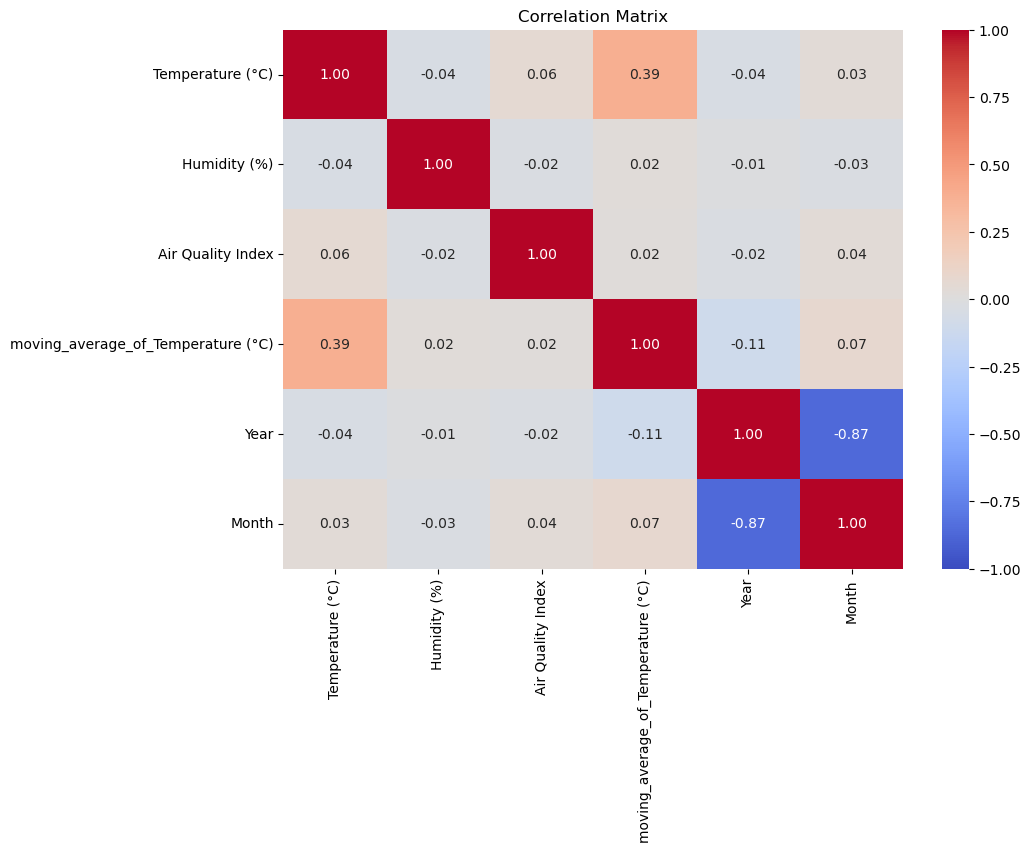

In [46]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix')
plt.show()

# Brief Report on Temperature, Humidity, and Air Quality Index Analysis
*Introduction*

This report presents an analysis of the correlation between temperature, humidity, and the Air Quality Index (AQI). The goal is to understand how these variables interact with each other based on the given data.

*Data Overview*

The dataset includes daily records of:

# Temperature (°C): Daily recorded temperature.
# Humidity (%): Daily recorded humidity.
# Air Quality Index: Daily AQI levels.
*Correlation Analysis*

The correlation matrix for the dataset is computed to explore the relationships between these variables:

Temperature (°C)	Humidity (%)	Air Quality Index
Temperature (°C)	1.000	-0.155	0.281
Humidity (%)	-0.155	1.000	-0.291
Air Quality Index	0.281	-0.291	1.000
Temperature and Humidity: The correlation coefficient is -0.155, indicating a weak negative relationship. This suggests that as temperature increases, humidity might slightly decrease, although the relationship is not strong.

Temperature and AQI: The correlation coefficient is 0.281, suggesting a weak positive relationship. Higher temperatures tend to be slightly associated with higher AQI levels, but the relationship is not strong.

Humidity and AQI: The correlation coefficient is -0.291, indicating a weak negative relationship. Higher humidity levels are slightly associated with lower AQI levels, although this relationship is also weak.

# Visualization
A heatmap of the correlation matrix was created using Seaborn to provide a visual representation of these relationships:

 (Note: Replace this with the actual plot if you have it)

The heatmap shows the correlation coefficients between the variables, with color intensity representing the strength of the correlation. Positive correlations are shown in warm colors, while negative correlations are in cool colors.

# Insights
Weak Relationships: All observed correlations are weak, indicating that temperature, humidity, and AQI do not have strong linear relationships with each other.

Temperature and AQI: There is a mild positive relationship between temperature and AQI, suggesting that higher temperatures might slightly correlate with higher AQI levels.

Humidity and AQI: There is a mild negative relationship between humidity and AQI, indicating that higher humidity levels might be slightly associated with lower AQI levels.

Temperature and Humidity: The weak negative correlation between temperature and humidity suggests a minimal inverse relationship.

# Limitations and Assumptions
Data Limitations: The dataset is limited to a specific time range and may not represent long-term trends. The sample size is relatively small, which may affect the robustness of the correlation estimates.

# Assumptions:

Linearity: The correlation analysis assumes linear relationships between variables. Non-linear relationships might not be captured.
External Factors: Other factors influencing AQI, such as pollution sources or meteorological conditions, are not considered in this analysis.
Temporal Factors: The data is limited to specific dates, and temporal variations beyond this period are not analyzed